In [48]:
#import smwa library
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [49]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [50]:
#load dataset
df = pd.read_csv('Dataset/dataset_komentar_instagram_cyberbullying.csv')

In [51]:
#tampilkan info dataset
print("INFORMASI DATASET")
print("=" * 50)
print(f"Jumlah data: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")
print(f"Kolom: {list(df.columns)}")
print("\nPreview data:")
print(df.head())

INFORMASI DATASET
Jumlah data: 400
Jumlah kolom: 3
Kolom: ['Id', 'Sentiment', 'Instagram Comment Text']

Preview data:
   Id Sentiment                             Instagram Comment Text
0   1  negative   <USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1   2  negative  Geblek lo tata...cowo bgt dibela2in balikan......
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...
3   4  negative  Intinya kalau kesel dengan ATT nya, gausah ke ...
4   5  negative  hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...


In [52]:
#distribusi sentimen
print("DISTRIBUSI SENTIMEN")
print("=" * 50)
sentiment_dist = df['Sentiment'].value_counts()
print(sentiment_dist)

DISTRIBUSI SENTIMEN
Sentiment
negative    200
positive    200
Name: count, dtype: int64


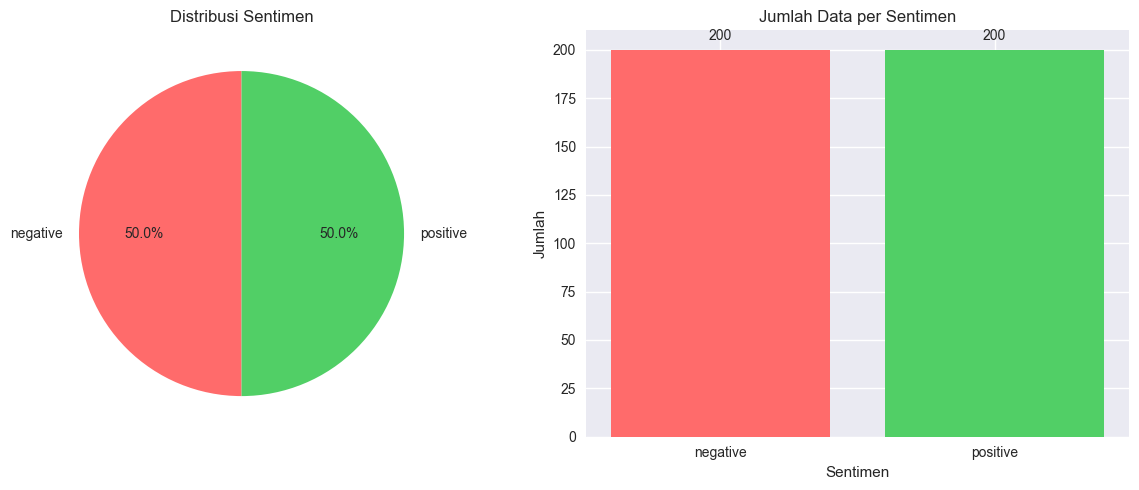

In [53]:
#visualisasi distribusi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#pie chart
axes[0].pie(sentiment_dist.values, labels=sentiment_dist.index, 
            autopct='%1.1f%%', startangle=90, colors=['#ff6b6b', '#51cf66'])
axes[0].set_title('Distribusi Sentimen')

#bar chart
axes[1].bar(sentiment_dist.index, sentiment_dist.values, 
            color=['#ff6b6b', '#51cf66'])
axes[1].set_title('Jumlah Data per Sentimen')
axes[1].set_ylabel('Jumlah')
axes[1].set_xlabel('Sentimen')
for i, v in enumerate(sentiment_dist.values):
    axes[1].text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
# SLANG DICTIONARY KHUSUS KOMENTAR INSTAGRAM INDONESIA
SLANG_DICT = {
    # Kata gaul umum
    'yg': 'yang',
    'dg': 'dengan',
    'tdk': 'tidak',
    'gak': 'tidak',
    'ga': 'tidak',
    'nggak': 'tidak',
    'gk': 'tidak',
    'g': 'tidak',
    'jgn': 'jangan',
    'jg': 'juga',
    'sdh': 'sudah',
    'udh': 'sudah',
    'udah': 'sudah',
    'blm': 'belum',
    'belom': 'belum',
    'dlm': 'dalam',
    'dgn': 'dengan',
    'sbg': 'sebagai',
    'tsb': 'tersebut',
    'tpi': 'tapi',
    'tp': 'tapi',
    'krn': 'karena',
    'karna': 'karena',
    'klo': 'kalau',
    'kl': 'kalau',
    'kalo': 'kalau',
    'kyk': 'kayak',
    'kyknya': 'kayaknya',
    'ato': 'atau',
    'utk': 'untuk',
    'buat': 'untuk',
    'pd': 'pada',
    'org': 'orang',
    'org2': 'orang-orang',
    'mrk': 'mereka',
    'kmu': 'kamu',
    'km': 'kamu',
    'loe': 'kamu',
    'lu': 'kamu',
    'gw': 'saya',
    'gue': 'saya',
    'aku': 'saya',
    'ane': 'saya',
    'sy': 'saya',
    'sya': 'saya',
    'aneh': 'saya',
    'dpt': 'dapat',
    'dapet': 'dapat',
    'bs': 'bisa',
    'bisa2': 'bisa-bisa',
    'bgt': 'banget',
    'bngt': 'banget',
    'skrg': 'sekarang',
    'skrng': 'sekarang',
    'skr': 'sekarang',
    'lg': 'lagi',
    'lgi': 'lagi',
    'lgian': 'lagian',
    'sm': 'sama',
    'sma': 'sama',
    'ama': 'sama',
    'd': 'di',
    'dr': 'dari',
    'dri': 'dari',
    'trus': 'terus',
    'trs': 'terus',
    'trz': 'terus',
    'dkk': 'dan kawan-kawan',
    'dll': 'dan lain-lain',
    'dsb': 'dan sebagainya',
    'aja': 'saja',
    'aj': 'saja',
    'doang': 'saja',
    'dong': 'dongs',
    'sih': 'sih',
    'deh': 'deh',
    'nih': 'ini',
    'tu': 'itu',
    'tuh': 'itu',
    'mah': 'mah',
    'kok': 'kok',
    'loh': 'loh',
    'yah': 'ya',
    'yaa': 'ya',
    'yuk': 'ayo',
    'yukk': 'ayo',
    'bkn': 'bukan',
    'bukan2': 'bukan-bukan',
    'knp': 'kenapa',
    'knapa': 'kenapa',
    'gmn': 'gimana',
    'gimana2': 'gimana-gimana',
    'gt': 'gitu',
    'gtu': 'gitu',
    'gitu2': 'gitu-gitu',
    'jd': 'jadi',
    'jdi': 'jadi',
    'pdhl': 'padahal',
    'smoga': 'semoga',
    'smga': 'semoga',
    'tll': 'terlalu',
    'tllu': 'terlalu',
    'trlalu': 'terlalu',
    'kmrn': 'kemarin',
    'kmren': 'kemarin',
    'brp': 'berapa',
    'brpa': 'berapa',
    'lbh': 'lebih',
    'lbih': 'lebih',
    'cpt': 'cepat',
    'cepat2': 'cepat-cepat',
    'plg': 'paling',
    'plng': 'paling',
    'sll': 'selalu',
    'slalu': 'selalu',
    'mksd': 'maksud',
    'mksud': 'maksud',
    'mksh': 'makasih',
    'trmksh': 'terima kasih',
    'thx': 'terima kasih',
    'ty': 'terima kasih',
    'makasi': 'terima kasih',
    'makasih': 'terima kasih',
    'ok': 'oke',
    'okey': 'oke',
    'okeee': 'oke',
    
    # Kata kasar/umpatan (dari data)
    'tolol': 'bodoh',
    'geblek': 'bodoh',
    'bego': 'bodoh',
    'bejat': 'jahat',
    'goblok': 'bodoh',
    'idiot': 'bodoh',
    'dungu': 'bodoh',
    'bencong': 'banci',
    'anjing': 'anjing',
    'babi': 'babi',
    'bangsat': 'bangsat',
    'bajingan': 'bajingan',
    'lonte': 'pelacur',
    'pelacur': 'pelacur',
    'jablay': 'jalang',
    'jalang': 'jalang',
    'pepek': 'vagina',
    'kontol': 'penis',
    'memek': 'vagina',
    'ngentot': 'bersetubuh',
    'jancok': 'sialan',
    'jancuk': 'sialan',
    'asu': 'anjing',
    'bangsat': 'sialan',
    'kampret': 'sialan',
    'brengsek': 'sialan',
    'jembut': 'rambut kemaluan',
    'kirik': 'anjing kecil',
    'kampungan': 'norak',
    'norak': 'kampungan',
    'keji': 'jahat',
    'laknat': 'terkutuk',
    'setan': 'iblis',
    
    # Kata khusus dari data komentar
    'pelakor': 'perebut laki orang',
    'pecun': 'perempuan curang',
    'japok': 'janda penggoda',
    'janda': 'janda',
    'gatel': 'gatal',
    'gundik': 'selir',
    'valakor': 'perebut laki orang',
    'cun': 'cantik',
    'pecun': 'perempuan curang',
    'muljem': 'mulan jameela',
    'lonte': 'pelacur',
    'jablay': 'jalang',
    'brengsek': 'sialan',
    'bacot': 'banyak bicara',
    'bacod': 'banyak bicara',
    'bacok': 'banyak bicara',
    'bacut': 'banyak bicara',
    'bacul': 'pengecut',
    'bacotan': 'omongan',
    'bacotannya': 'omongannya',
    
    # Kata gaul artis/selebritis
    'ertong': 'artis',
    'hartis': 'artis',
    'celebgram': 'selebriti instagram',
    'selebgram': 'selebriti instagram',
    'netijen': 'netizen',
    'nitezer': 'netizen',
    'balajaer': 'pembela artis',
    'balaaer': 'pembela artis',
    'baer': 'pembela artis',
    'bajer': 'pembela artis',
    'mujaer': 'pemuja artis',
    'jaer': 'pembela artis',
    'folowers': 'followers',
    'folower': 'follower',
    'folow': 'follow',
    'folo': 'follow',
    
    # Singkatan nama artis (dari data)
    'att': 'ayutingting',
    'nagita': 'nagita',
    'rafi': 'raffi',
    'gigi': 'gigi',
    'via': 'via vallen',
    'ayu': 'ayu tingting',
    'mulan': 'mulan jameela',
    'jedun': 'jessica iskandar',
    'mamad': 'raffi ahmad',
    'mimi': 'mimi peri',
    'raisa': 'raisa',
    'agnes': 'agnes monica',
    'ishana': 'ishana',
    'niki': 'nikita',
    'kdr': 'kadir',
    'kador': 'kadir',
    'bunda': 'ibu',
    'mba': 'mbak',
    'mb': 'mbak',
    'kak': 'kakak',
    'dek': 'adik',
    'dedek': 'adik',
    'emak': 'ibu',
    'bapak': 'ayah',
    'papa': 'ayah',
    'mama': 'ibu',
    'ibu2': 'ibu-ibu',
    'emak2': 'ibu-ibu',
    
    # Kata bahasa campuran
    'kids': 'anak',
    'jaman': 'zaman',
    'now': 'sekarang',
    'time': 'waktu',
    'love': 'cinta',
    'happy': 'bahagia',
    'sad': 'sedih',
    'mood': 'suasana hati',
    'story': 'cerita',
    'status': 'status',
    'posting': 'posting',
    'upload': 'unggah',
    'caption': 'keterangan',
    'comment': 'komentar',
    'share': 'bagikan',
    'like': 'suka',
    'unlike': 'tidak suka',
    'tag': 'tandai',
    'mention': 'sebut',
    'fyp': 'for you page',
    'dm': 'pesan langsung',
    'pm': 'pesan pribadi',
    'btw': 'by the way',
    'omg': 'oh my god',
    'lol': 'laugh out loud',
    'wkwk': 'wkwk',
    'wkwkwk': 'wkwk',
    'haha': 'haha',
    'hahaha': 'haha',
    'hehe': 'hehe',
    'hihi': 'hihi',
    
    # Kata repetitif (dari data)
    'anjir': 'anjing',
    'anjirr': 'anjing',
    'anjirrr': 'anjing',
    'anyiennnnggg': 'anying',
    'hadeww': 'aduh',
    'hadewww': 'aduh',
    'hadewwww': 'aduh',
    'weeewww': 'wow',
    'wowww': 'wow',
    'yessss': 'ya',
    'noooo': 'tidak',
    'duhhh': 'aduh',
    'duhh': 'aduh',
    'ihhh': 'ih',
    'asliii': 'asli',
    'banggeett': 'banget',
    'bangettt': 'banget',
    'kerennnn': 'keren',
    'kerenn': 'keren',
    'cantikk': 'cantik',
    'cantikkk': 'cantik',
    'gantenggg': 'ganteng',
    'gantengg': 'ganteng',
    'lucuu': 'lucu',
    'lucuuu': 'lucu',
    'baikk': 'baik',
    'baikss': 'baik',
    'jelekk': 'jelek',
    'jelekkk': 'jelek',
    'norakk': 'norak',
    'norakkk': 'norak',
    
    # Typo umum
    'emang': 'memang',
    'emng': 'memang',
    'bner': 'benar',
    'bener': 'benar',
    'pake': 'pakai',
    'pke': 'pakai',
    'bikin': 'buat',
    'bkin': 'buat',
    'ngmg': 'ngomong',
    'ngmng': 'ngomong',
    'ngomong': 'bicara',
    'bicara': 'berkata',
    'bilang': 'katakan',
    'kaya': 'kayak',
    'kek': 'kayak',
    'kayanya': 'kayaknya',
    'kayax': 'kayaknya',
    'kayakny': 'kayaknya',
    'kliatan': 'kelihatan',
    'keliatan': 'kelihatan',
    'kliatan': 'kelihatan',
    'keliatannya': 'kelihatannya',
    'ngaco': 'ngawur',
    'ngawur': 'sembarangan',
    'sembrono': 'ceroboh',
    'ceroboh': 'tidak hati-hati',
    
    # Kata dari komentar spesifik
    'pencitraan': 'pencitraan',
    'gimmick': 'rekayasa',
    'settingan': 'rekayasa',
    'kabur': 'lari',
    'kaburin': 'lari dari',
    'kaburkan': 'lari kan',
    'diem': 'diam',
    'diemin': 'diamkan',
    'diemvang': 'diam saja',
    'mingkem': 'diam',
    'bacot': 'banyak bicara',
    'bacotan': 'omongan',
    'nyinyir': 'mencela',
    'nyinyirin': 'mencela',
    'nyinyiran': 'celaan',
    'sok': 'pura-pura',
    'sokan': 'pura-pura',
    'alay': 'kekanakan',
    'lebay': 'berlebihan',
    'lebayan': 'berlebihan',
    'norak': 'kampungan',
    'norakan': 'kampungan',
    'kampungan': 'norak',
    'jaim': 'jaga image',
    'jaimin': 'jaga image',
    'caper': 'cari perhatian',
    'caperan': 'cari perhatian',
    'alay': 'kekanakan',
    'alayan': 'kekanakan',
    
    # Kata positif
    'keren': 'hebat',
    'mantap': 'bagus',
    'mantul': 'mantap betul',
    'cakep': 'bagus',
    'kece': 'keren',
    'gemesh': 'gemas',
    'gemes': 'gemas',
    'gemesin': 'menggemaskan',
    'gemoy': 'imut',
    'imut': 'lucu',
    'lucu': 'menggemaskan',
    'gemes': 'gemas',
    'baper': 'bawa perasaan',
    'baperan': 'bawa perasaan',
    'baperin': 'bawa perasaan',
    'bucin': 'budak cinta',
    'bucinan': 'budak cinta',
    
    # Tambahan dari pola komentar
    'woles': 'santai',
    'santuy': 'santai',
    'santai': 'tenang',
    'galau': 'sedih',
    'galauin': 'menyedihkan',
    'galauan': 'kesedihan',
    'gabut': 'gak ada kerjaan',
    'gabutan': 'tidak ada kerjaan',
    'mager': 'malas gerak',
    'mageran': 'malas gerak',
    'malming': 'malam minggu',
    'jemput': 'jemput',
    'jemputan': 'penjemputan',
    'jomblo': 'single',
    'jombloan': 'masa single',
    'jomblones': 'jomblo kronis',
    
    # Kata ending -in (informal)
    'liat': 'lihat',
    'liatin': 'lihat',
    'ngerti': 'mengerti',
    'ngertiin': 'mengerti',
    'tanggung': 'tanggung',
    'tanggungin': 'menanggung',
    'tanggungjawab': 'tanggung jawab',
    'tanggungjawabin': 'menanggung jawab',
    'perhatiin': 'perhatikan',
    'perhatian': 'perhatian',
    'denger': 'dengar',
    'dengerin': 'dengarkan',
    'nunggu': 'tunggu',
    'nungguin': 'menunggu',
    'nungguinnya': 'menunggunya',
    'nungguinnye': 'menunggunya',
    'nungguinye': 'menunggunya',
    'bantuin': 'bantu',
    'bantuan': 'bantuan',
    'tolongin': 'tolong',
    'tolongan': 'pertolongan',
    'jemputin': 'jemput',
    'jemputan': 'penjemputan',
}

In [55]:
def clean_text(text):
    """Basic text cleaning"""
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(text.split())  # Remove extra whitespace
    return text

In [56]:
def normalize_slang(text, slang_dict=SLANG_DICT):
    """Normalize slang words"""
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

In [57]:
# Initialize stemmer and stopword remover
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

In [58]:
def complete_preprocessing(text):
    """Complete preprocessing pipeline"""
    text = clean_text(text)
    text = normalize_slang(text)
    text = stopword_remover.remove(text)  # Remove stopwords
    text = stemmer.stem(text)  # Stemming
    return text

In [59]:
# Apply preprocessing
print("🔄 Memulai preprocessing...")
df['cleaned_text'] = df['Instagram Comment Text'].apply(complete_preprocessing)

🔄 Memulai preprocessing...


In [60]:
# Tampilkan contoh sebelum dan sesudah
print("\n📋 CONTOH SEBELUM & SESUDAH PREPROCESSING")
print("=" * 60)
sample_data = df.sample(5, random_state=42)
for idx, row in sample_data.iterrows():
    print(f"\n✅ Contoh {idx}:")
    print(f"   Sentimen: {row['Sentiment']}")
    print(f"   Asli: {row['Instagram Comment Text'][:100]}...")
    print(f"   Bersih: {row['cleaned_text'][:100]}...")
    print("-" * 60)


📋 CONTOH SEBELUM & SESUDAH PREPROCESSING

✅ Contoh 209:
   Sentimen: positive
   Asli: Bagus dong.. mencari ilmu kapanpun dimanapun.. itu karena suaminya orang berpendidikan ????????????...
   Bersih: bagus dongs cari ilmu kapan mana karena suami orang didik...
------------------------------------------------------------

✅ Contoh 280:
   Sentimen: positive
   Asli: Pembagian suaranya pas bnget,pecah suaranya jg cakep...
   Bersih: bagi suara pas bnget pecah suara bagus...
------------------------------------------------------------

✅ Contoh 33:
   Sentimen: negative
   Asli: Cowok macam anjing cuihhh... Orang kaya tidak akan pernah berkoar gua orang yang ping kaya sedunia.....
   Bersih: cowok macam anjing cuihhh orang kayak pernah koar gua orang ping kayak dunia semua orang tau kalau o...
------------------------------------------------------------

✅ Contoh 210:
   Sentimen: positive
   Asli: Sukak cewe cantik dan kmauan blajarnya tinggi ???...
   Bersih: sukak cewe cantik kmauan 

In [61]:
# Hitung panjang teks sebelum dan sesudah
df['original_length'] = df['Instagram Comment Text'].apply(lambda x: len(str(x).split()))
df['cleaned_length'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

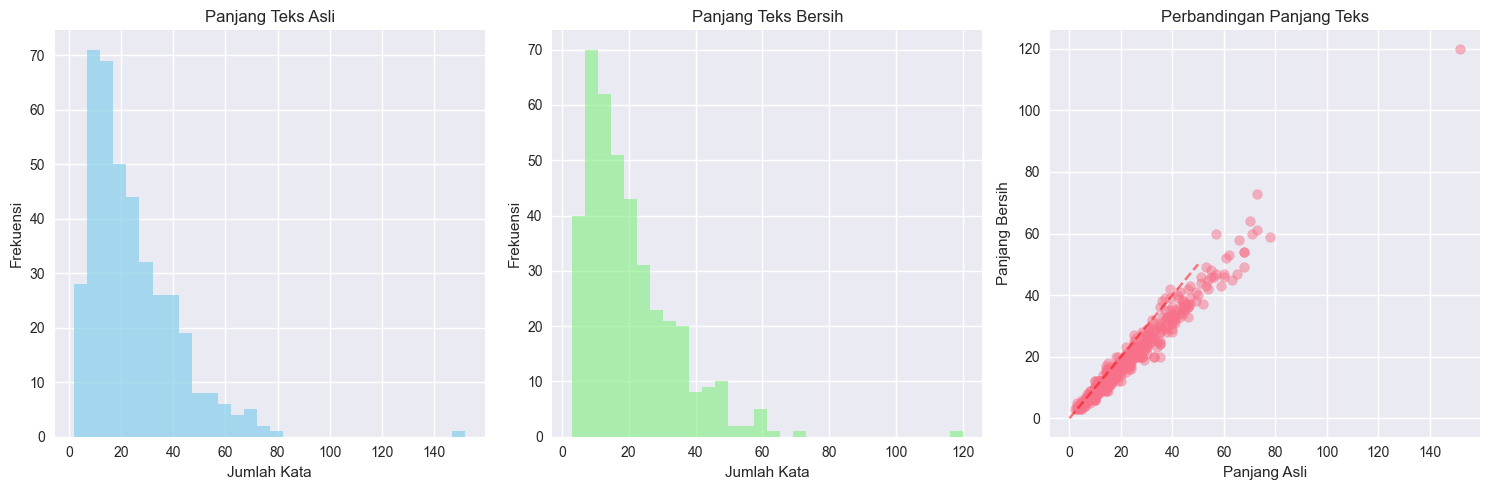

In [62]:
# Visualisasi perbedaan panjang
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Histogram panjang asli
axes[0].hist(df['original_length'], bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('Panjang Teks Asli')
axes[0].set_xlabel('Jumlah Kata')
axes[0].set_ylabel('Frekuensi')

# Histogram panjang bersih
axes[1].hist(df['cleaned_length'], bins=30, alpha=0.7, color='lightgreen')
axes[1].set_title('Panjang Teks Bersih')
axes[1].set_xlabel('Jumlah Kata')
axes[1].set_ylabel('Frekuensi')
# Scatter plot perbandingan
axes[2].scatter(df['original_length'], df['cleaned_length'], alpha=0.5)
axes[2].plot([0, 50], [0, 50], 'r--', alpha=0.5)
axes[2].set_title('Perbandingan Panjang Teks')
axes[2].set_xlabel('Panjang Asli')
axes[2].set_ylabel('Panjang Bersih')

plt.tight_layout()
plt.savefig('text_length_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
# Statistik
print("\n📊 STATISTIK PANJANG TEKS")
print("=" * 50)
print(f"Rata-rata panjang asli: {df['original_length'].mean():.2f} kata")
print(f"Rata-rata panjang bersih: {df['cleaned_length'].mean():.2f} kata")
print(f"Pengurangan rata-rata: {df['original_length'].mean() - df['cleaned_length'].mean():.2f} kata")


📊 STATISTIK PANJANG TEKS
Rata-rata panjang asli: 23.95 kata
Rata-rata panjang bersih: 20.12 kata
Pengurangan rata-rata: 3.82 kata


In [64]:
# Ekstrak kata-kata dari teks bersih
all_words = ' '.join(df['cleaned_text'].tolist()).split()
word_freq = Counter(all_words)

In [65]:
# Ambil 20 kata paling umum
top_words = word_freq.most_common(20)

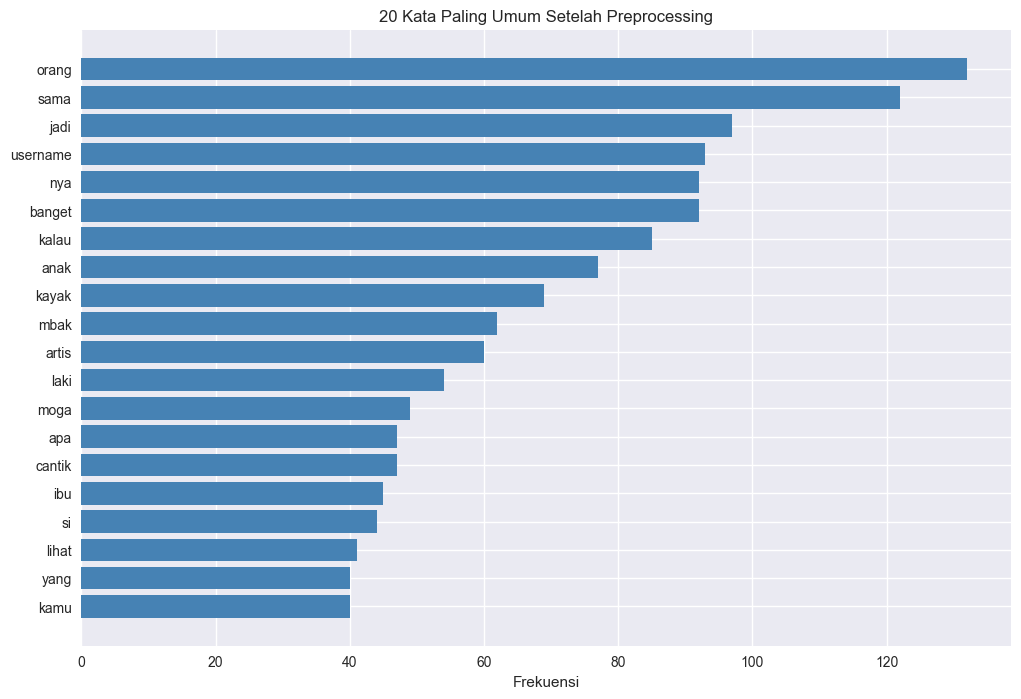

In [66]:
# Visualisasi kata paling umum
plt.figure(figsize=(12, 8))
words, counts = zip(*top_words)
y_pos = np.arange(len(words))

plt.barh(y_pos, counts, color='steelblue')
plt.yticks(y_pos, words)
plt.xlabel('Frekuensi')
plt.title('20 Kata Paling Umum Setelah Preprocessing')
plt.gca().invert_yaxis()


In [67]:
# Save cleaned data
df.to_csv('instagram_comments_cleaned.csv', index=False)

In [68]:
print("✅ PREPROCESSING SELESAI!")
print("=" * 50)
print(f"Data disimpan sebagai: instagram_comments_cleaned.csv")
print(f"Total data: {len(df)}")
print(f"Kolom baru: cleaned_text, original_length, cleaned_length")

✅ PREPROCESSING SELESAI!
Data disimpan sebagai: instagram_comments_cleaned.csv
Total data: 400
Kolom baru: cleaned_text, original_length, cleaned_length
